In [1]:
# Import all necesary packages and libraries 
from json import JSONDecodeError
import requests
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from nltk import download
#download('vader_lexicon')
import pandas as pd
import numpy as np
import time
import json

Media Data:
Media ID: 17989315337197974
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/371750697_4895367227254265_1247121150298733897_n.jpg?_nc_cat=103&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=D6D3_fXzkrIAX84Sc89&_nc_ht=scontent.cdninstagram.com&edm=AL-3X8kEAAAA&oh=00_AfACdqErn_WP158m8QGi4seS5NeLvLEhGXBPDFMLz0bC2A&oe=64FF534C
Caption: @shapisy am not here to debate
Timestamp: 2023-08-30T05:41:23+0000
Caption Sentiments: neutral
Comments:
- Text: @shapisy who said debate?🤣
Comments Sentiments: neutral
Replies:
Likes Response Error:  (#100) Tried accessing nonexisting field (insights) on node type (ShadowIGComment) : No likes for this caption
  - Reply: @shawapalar 🤣
     Replier Username: Unknown User
     Reply Date: 2023-08-30T05:46:41+0000
     Reply Sentiment: neutral
     Reply Like Count: 0

Likes: 4
Comment Counts: 1
Total Engagements: 5
--------------------------

Media ID: 17989304660245600
Media Type: VIDEO
Media URL: https://scontent.cdninstagram.com/o1/v

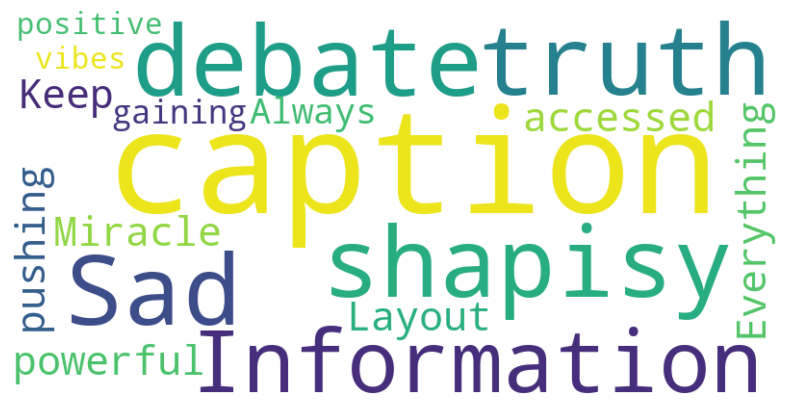


WordCloud for Replies:
Comments Sentiments
[]                                                            4
['neutral']                                                   2
['positive', 'positive', 'neutral', 'negative', 'neutral']    1
['positive', 'neutral', 'neutral']                            1
['neutral', 'neutral']                                        1
['positive']                                                  1
Name: count, dtype: int64

Pie Chart:


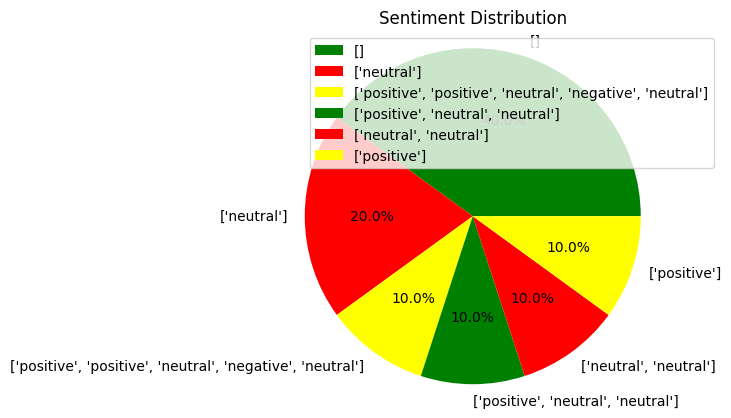


Histogram:

Tagged media:


Media ID: 17967071993442372
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/371542167_6647176185373164_8369022627312702760_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=xNBRX0hAcCsAX-HGIq0&_nc_ht=scontent.cdninstagram.com&edm=AJ7ooaQEAAAA&oh=00_AfBdJUBm5PURGPlwPOOb_xn3RJSAD7u3wb2zd9XWC9YKDA&oe=64FDF9BD
Caption: "Ungrateful"
Timestamp: 2023-08-30T05:54:12+0000
Caption Sentiment: neutral
Error: Comments data not present for Media ID 17967071993442372
Error: Comments data not present for Media ID 17967071993442372
Error: Comments data not present for Media ID 17967071993442372

Media ID: 18073395025396196
Media Type: IMAGE
Media URL: https://scontent.cdninstagram.com/v/t51.29350-15/370966008_254595007500840_7897544977095278640_n.jpg?_nc_cat=100&ccb=1-7&_nc_sid=8ae9d6&_nc_ohc=Bwg4jqwrYtoAX9i6BO8&_nc_ht=scontent.cdninstagram.com&edm=AJ7ooaQEAAAA&oh=00_AfCYVduYMaJNN9lwHyBPkFpQvPU4gbAp4ApmV38YASy9Sw&oe=64FE9A86
Caption: shapisy goo

In [2]:
# Instagram IDs
access_token = 'EAAMC8ERtLFABOZC2zJZBq5ZBsrpjR2qhIfV3BQ7zMKTVMH0yNnBg1kUMVsLLEfO2bGGhhIyVssnmWdcMwb2szsCvdNgu5T5mgB3gZBEKwCNwBXV7vmoMxair3LZAZBTAmiYp49ReCEf0IO5uZA1UtWcFk5dPYJc1XjpnyNU04shGly8KL4qRaKgLB9sAxaVyxf6aq9U17Sx'
instagram_account_id = '17841406879294936'
app_id = '847655893544016'
app_secret = 'a4623c3fcb8b419659fb4fe7a2df45f3'
callback_url = ''

# API endpoint URLs
base_url = 'https://graph.facebook.com/v17.0/'
media_url = f'{base_url}{instagram_account_id}/media'
insights_url = f'{base_url}{instagram_account_id}/insights'

# Parameters for the API requests
media_params = {
    'fields': 'id,media_type,media_url,caption,timestamp,comments{comment_count,replies{id,text}}',
    'access_token': access_token
}

insights_params = {
    'metric': 'impressions, reach, replies, likes, total_interactions, comments',
    'metric_type': 'total_value',
    'period': 'day',
    'access_token': access_token
}

def fetch_instagram_data():
    url = f'{base_url}{instagram_account_id}?fields=media.limit(10){{caption,media_type,media_url,timestamp,id,mentioned_comment,mentioned_media}}&access_token={access_token}'
    response = requests.get(url)
    instagram_data = response.json()  # Parse the response content as JSON
    return instagram_data

def fetch_instagram_insights(media_id):
    insights_url = f'{base_url}{media_id}/insights'
    response = requests.get(insights_url, params=insights_params)
    data = response.json()
    return data

# Function to perform sentiment analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity # type: ignore
    if sentiment > 0:
        return 'positive'
    elif sentiment < 0:
        return 'negative'
    else:
        return 'neutral'

# Function to get comments for a specific media ID
def get_comments(instagram_account_id, media_id):
    comments_url = f'{base_url}{media_id}/comments?fields=text,id,username,mentioned_comment&{instagram_account_id}&access_token={access_token}'
    response = requests.get(comments_url)
    data = response.json()
    return data

# Function to get comment IDs for a specific media ID
def get_comment_ids(media_id):
    comments_endpoint = f'{base_url}{media_id}/comments?fields=id'
    response = requests.get(comments_endpoint)
    data = response.json().get('data', [])

    comment_ids = [comment.get('id') for comment in data]
    return comment_ids

# Function to get replies for a specific comment ID
def get_replies(comment_id):
    endpoint = f'{base_url}{comment_id}'
    params = {
        'fields': 'replies, text, like_count, username',
        'access_token': access_token
    }
    
    response = requests.get(endpoint, params=params)
    data = response.json()
    
    if 'replies' in data:
        return data['replies']
    else:
        return None

# Function to get comment count for a specific media ID
def get_comment_count(media_id):
    comments_url = f'{base_url}{media_id}/comments?access_token={access_token}'
    response = requests.get(comments_url)
    data = response.json()
    return len(data.get('data', []))  # Return the length of the 'data' list


# Function to get likes for a specific media ID
def get_likes(media_id):
    likes_url = f'{base_url}{media_id}/insights?metric=engagement,likes,impressions,reach&access_token={access_token}'
    response = requests.get(likes_url)
    data = response.json()

    # Check for errors in the response
    if 'error' in data:
        error_message = data['error']['message']
        print("Likes Response Error: ", error_message,":", "No likes for this caption")
        return None  # Return None to indicate error

    return data

def fetch_tagged_media(instagram_account_id, access_token):
    tagged_media_url = f'{base_url}{instagram_account_id}/tags'
    params = {
        'access_token': access_token,
        'fields': 'id,media_type,media_url,caption,timestamp,text',
        'limit': 10  # You can adjust the limit as needed
    }

    response = requests.get(tagged_media_url, params=params)
    if response.status_code == 200:
        data = response.json()

        tagged_media = data.get('data', [])
        if tagged_media:
            for media in tagged_media:

                media_data = []
                media_id = media.get('id')
                media_type = media.get('media_type')
                media_url = media.get('media_url')
                caption = media.get('caption')
                timestamp = media.get('timestamp')

                media_data.append({
                    'Media ID': media_id,
                    'Media Type': media_type,
                    'Media URL': media_url,
                    'Caption': caption,
                    'Timestamp': timestamp
                })
                
                print()
                print("Media ID:", media_id)
                print("Media Type:", media_type)
                print("Media URL:", media_url)
                print("Caption:", caption)
                print("Timestamp:", timestamp)

                # Sentiment analysis
                caption_sentiment = analyze_sentiment(caption)
                print("Caption Sentiment:", caption_sentiment)

                comment_sentiment = []            
                comments_txt_list = []
                comment_sentiments_list = []

                max_retries = 3
                retry_delay = 5
                
                for attempt in range(max_retries):
                    try:
                        # Fetch comments for the tagged media
                        comments_data = get_comments(instagram_account_id, media[media_id])
                        # checking
                        print("my cmmnts: ", comments_data)

                        replies_data_list = []
                        replies_sentiments_list = []
                        
                        if 'data' in comments_data:
                            for comment in comments_data['data']:
                                comment_txt = comment.get('data', 'No Comments Found')
                                comment_sentiment = analyze_sentiment(comment_txt)
                                print("- Text:", comment['text'])
                                comment_username = comment.get('username', 'Unknown User')
                                print(f"Comments Sentiments: {comment_sentiment}")
                                print("Comment:", comment_txt)
                                print("Username:", comment_username)
                                comments_txt_list.append(comment_txt)
                                comment_sentiments_list.append(comment_sentiment)
                                
                                replies_data = get_replies(comment['id'])
                                print("Replies:")

                                if replies_data is not None:
                                    for reply in replies_data['data']:
                                        reply_text = reply.get('text', 'No Reply Text Found')
                                        replier_username = reply.get('username', 'Unknown User')
                                        reply_date = reply.get('date', 'No Date')
                                        replies_count = reply.get('like_count')
                                        replies_data_list.append(reply_text)
                                        
                                        reply_sentiment = analyze_sentiment(reply_text)
                                        replies_sentiments_list.append(reply_sentiment)
                                        
                                        print("  - Reply:", reply_text)
                                        print("     Replier Username:", replier_username)
                                        print("     Reply Date:", reply_date)
                                        print("     Reply Sentiment:", reply_sentiment)
                                        print("     Reply Like Count:", replies_count)
                                        print("--------------------")
                                        print()

                                else:
                                    print("  No replies found.")
                                    print()
                        else:
                            print("No comments data found in the response.")
                        print()

                    except requests.exceptions.RequestException as e:
                        print(f"Error fetching comments for Media ID {media_id}: {e}")
                        print(f"Error fetching comments (attempt {attempt+1}): {e}")
                        print("Retrying after delay...")
                        time.sleep(retry_delay)
                    except KeyError:
                        print(f"Error: Comments data not present for Media ID {media_id}")

                df = pd.DataFrame(media_data)
                df.to_csv('tagged_media.csv', index=False)
                #print("Tagged media data saved to tagged_media.csv")

            return data

        else:
            print("No Tagged Media Found")
        print()
        
    else:
        print(f"API request failed with status code: {response.status_code}")
        print(response.text)
        return []

# Function to get mentioned_comments
def get_mentioned_comment_data(instagram_account_id, access_token):
    params = {
        'fields': 'id,media,username,mentioned_comment',
        'access_token': access_token
    }
    mentined_comment_url = f'{base_url}{instagram_account_id}'
    
    response = requests.get(mentined_comment_url, params=params)
    print("checking mentioned comments", response)

    #if response.status_code != 200:
     #   raise Exception(f'Failed to get mentioned comment data. Code: {response.status_code}. Content: {response.content}')

    data = response.json().get('data', [])
    print("mention comment data", data)
    
    comment_ids = []

    if 'mentioned_comment' in data:
        
        mentioned_comment_data = data['mentioned_comment']
        
        caption = mentioned_comment_data.get('caption')
        username = mentioned_comment_data.get('username')
        mentioned_comment = mentioned_comment_data.get('text')
        
        # Sentiment analysis
        caption_sentiment = analyze_sentiment(caption)
        mentioned_comment_sentiment = analyze_sentiment(mentioned_comment)
        
        print("Caption:")
        print("Text:", caption)
        print("Username:", username)
        print("Sentiment Analysis:", caption_sentiment)
        print("\nMentioned Comment:")
        print("Text:", mentioned_comment)
        print("Username:", username)
        print("Sentiment Analysis:", mentioned_comment_sentiment)
    else:
        print("No mentioned comments data available.")
        print()
    
# Function to get mentioned media for a specific IG user
def get_mentions_data():
    # Define the API endpoint for fetching mentioned media
    endpoint = f"{base_url}{instagram_account_id}?fields=mentioned_media{{permalink,caption,media_type,thumbnail_url,thumbnail_width,thumbnail_height,like_count,comments_count,timestamp}},media{{comments_count,like_count,caption}}&access_token={access_token}"

    try:
        # Send a GET request to the Instagram Graph API
        response = requests.get(endpoint)
        response_json = response.json()

        # Check if the response contains mentioned media data
        if 'mentioned_media' in response_json:
            mentioned_media = response_json['mentioned_media']

            # Iterate through mentioned media objects
            for media_data in mentioned_media['data']:
                media_id = media_data['id']
                caption = media_data['caption']
                media_type = media_data['media_type']

                # Fetch comments and likes for the mentioned media
                comments_data = get_comments(instagram_account_id, media_id)
                likes_data = get_likes(media_id)

                # Extract comments, replies, and likes as needed
                comments = []
                likes = []

                if 'data' in comments_data:
                    for comment in comments_data['data']:
                        comment_text = comment.get('text', 'No comment text')
                        comments.append(comment_text)

                        # Fetch replies for each comment if needed
                        replies_data = get_replies(comment['id'])
                        if replies_data is not None:
                            for reply in replies_data['data']:
                                reply_text = reply.get('text', 'No reply text')
                                comments.append(reply_text)

                if likes_data is not None:
                    for like in likes_data['data']:
                        likes.append(like['username'])

                # Process the extracted data as needed
                print(f"Media ID: {media_id}")
                print(f"Caption: {caption}")
                print(f"Media Type: {media_type}")
                print(f"Comments: {comments}")
                print(f"Likes: {likes}")
                print("--------------------------")

        else:
            print("No mentioned media found.")

    except requests.exceptions.RequestException as e:
        print("Request Error:", e)
    except json.JSONDecodeError as e:
        print("JSON Decode Error:", e)

# Function to fetch and print media data
def get_media_data():
    response = fetch_instagram_data()
    extracted_data = []
    #print("Response Content:", response.text)
    try:
        #data = response.json()
        #if 'data' in response:
            for media in response['media']['data']:

                media_id = media['id']
                media_type = media['media_type']
                media_link = media['media_url']
                caption = media.get('caption', 'No caption')
                timestamp = media['timestamp']

                caption_sentiment = analyze_sentiment(caption)

                #Printing for texting
                print(f"Media ID: {media_id}")
                print(f"Media Type: {media_type}")
                print(f"Media URL: {media_link}")
                print(f"Caption: {caption}")
                print(f"Timestamp: {timestamp}")
                print(f"Caption Sentiments: {caption_sentiment}")

                # This allows you to access insights as per caption
                insights = fetch_instagram_insights(media_id)
                insights_data = insights.get('data', [{}])[0]

                likes_count = 0  # Initialize with a default value
                likes_data = get_likes(media['id'])
                if likes_data is not None:
                # Accessing likes count based on the returned data structure
                    likes_count = likes_data['data'][0]['values'][0]['value']

                comment_count = get_comment_count(media['id'])
        
                total_engagements = likes_count + comment_count

                # List to store sentiment scores for comments
                comment_sentiment = []            
                comments_txt_list = []
                comment_sentiments_list = []

                comments_data = get_comments(instagram_account_id, media['id'])
                comment_ids = get_comment_ids(media['id'])
    
                replies_data_list = []
                replies_sentiments_list = []
                
                if 'data' in comments_data:
                    print("Comments:")
                    for comment in comments_data['data']:
                        comment_txt = comment.get('text', 'No Comments Found')
                        comment_sentiment = analyze_sentiment(comment_txt)
                        print("- Text:", comment['text'])
                        print(f"Comments Sentiments: {comment_sentiment}")
                        comments_txt_list.append(comment_txt)
                        comment_sentiments_list.append(comment_sentiment)
                        
                        replies_data = get_replies(comment['id'])
                        print("Replies:")

                        replies_likes_count = 0  # Initialize with a default value
                        #replies_likes_data = get_likes(comment['id'])
                        #if replies_likes_data is not None:
                        # Accessing likes count based on the returned data structure
                         #   replies_likes_count = replies_likes_data['data'][0]['values'][0]['value']

                        if replies_data is not None:
                            for reply in replies_data['data']:
                                reply_timestamp = reply['timestamp']

                                reply_text = reply.get('text', 'No Reply Text Found')
                                replier_username = reply.get('username', 'Unknown User')
                                #replies_count = reply.get('like_count')
                                replies_data_list.append(reply_text)

                                
                                replies_likes_data = get_likes(reply['id'])
                                if replies_likes_data is not None:
                                # Accessing likes count based on the returned data structure
                                    replies_likes_count = replies_likes_data['data'][0]['values'][0]['value']
                                
                                reply_sentiment = analyze_sentiment(reply_text)
                                replies_sentiments_list.append(reply_sentiment)
                                
                                print("  - Reply:", reply_text)
                                print("     Replier Username:", replier_username)
                                print("     Reply Date:", reply_timestamp)
                                print("     Reply Sentiment:", reply_sentiment)
                                print("     Reply Like Count:", replies_likes_count)
                        else:
                            print("  No replies found.")
                        print()
                else:
                    print("No comments data found in the response.")

                extracted_data.append({
                    'Media ID': media_id,
                    'Media Type': media_params,
                    'Media URL': media_link,
                    'Caption': caption,
                    'Timestamp': timestamp,
                    'Caption Sentiment': caption_sentiment,
                    'Likes': likes_count,
                    'Comments': comments_txt_list,
                    'Comments Sentiments': comment_sentiments_list,
                    'Comment Count': comment_count,
                    'Replies': replies_data_list,
                    'Replies Sentiments': replies_sentiments_list,
                    'Total Engagements': total_engagements
                })

                print(f"Likes: {likes_count}")
                #print(f"Replies Sentiment: {replies_sentiments_list}")
                print(f"Comment Counts: {comment_count}")
                print(f"Total Engagements: {total_engagements}")
                print("--------------------------")
                print()

            df = pd.DataFrame(extracted_data)
            df.to_csv('instagram_data.csv', index=False)
        #else:
            #print("No media data available.")

    except JSONDecodeError as e:
        print("JSON Decode Error:", e)
        print("Response Content:", response.text)

# Function to fetch and print insights data
def get_insights_data():
    response = requests.get(insights_url, params=insights_params)
    print("Response Content:", response.text)
    try:
        data = response.json().get('data', [])
        if 'data' in data:
            for insight in data['data']:
                if 'period_start' in insight:
                    print(f"Date: {insight['period_start']}")
                    for metric, value in insight['values'][0].items():
                        print(f"{metric.capitalize()}: {value}")
                    print("--------------------------")
                #else:
                 #   print("Error: 'period_start' key not found in insight data")
                print(f"Name: {insight['name']}")
                print(f"Period: {insight['period']}")
                print(f"Title: {insight['title']}")
                print(f"Description: {insight['description']}")
                print(f"Total Value: {insight['total_value']['value']}")
                print(f"ID: {insight['id']}")
                print("-" * 50)

        else:
            print("No media data available.")

    except JSONDecodeError as e:
        print("JSON Decode Error:", e)
        print("Response Content:", response.text)

# Function to plot a word cloud
def plot_wordcloud(text_list):
    if not text_list:
        print("No data to generate WordCloud from")
        return
    
    text = ' '.join(text_list)
    if text:
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()
    else:
        print("Error occured while printing worldcloud")

# Function to plot pie chart
def plot_pie_chart(data, labels, title):
    plt.pie(data, labels=labels, autopct='%1.1f%%', colors=['green', 'red', 'yellow'])
    plt.title(title)
    plt.axis('equal')
    plt.legend()
    plt.show()

# Function to plot histogram
def plot_histogram(data, bins, title, x_label, y_label):
    plt.hist(data, bins=bins, color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.broken_barh
    plt.legend()
    plt.show()

# Function to fetch captions and perform sentiment analysis
def get_sentiment_data():
    response = requests.get(media_url, params=media_params)
    data = response.json()
    captions = [media['caption'] for media in data['data'] if 'caption' in media]
    sentiment_data = {'positive': 0, 'negative': 0, 'neutral': 0}
    
    for caption in captions:
        sentiment = analyze_sentiment(caption)
        sentiment_data[sentiment] += 1

    return sentiment_data

if __name__ == "__main__":
    print("Media Data:")
    get_media_data()

    print("\nInsights Data:")
    get_insights_data()

    sentiment_data = get_sentiment_data()
    print("\nSentiment Analysis:")
    print(sentiment_data)

     # Plotting WordCloud for captions and replies
    captions = pd.read_csv('instagram_data.csv')['Caption'].tolist()
    replies = pd.read_csv('instagram_data.csv')['Replies Sentiments'].sum()
    
    print("\nWordCloud for Captions:")
    # Check if caption list is not empty
    if captions:
        plot_wordcloud(captions)
    else:
        print("No captions to generate WordCloud from")

    print("\nWordCloud for Replies:")
    # Check if replies list is not empty
    #if replies:
     #   plot_wordcloud(replies)
    #else:
     #    print("No replies to generate WordCloud from")

    sentiment_data = pd.read_csv('instagram_data.csv')['Comments Sentiments'].value_counts()
    print(sentiment_data)

    print("\nPie Chart:")
    plot_pie_chart(sentiment_data, sentiment_data.index, title='Sentiment Distribution')

    print("\nHistogram:")
    #plot_histogram()

    print("\nTagged media:")
    print()
    fetch_tagged_media(instagram_account_id, access_token)
    print()

    print("\nMentioned comments:")
    print()
    get_mentioned_comment_data(instagram_account_id, access_token)

    #Mentioned media data
    
    print("\nMentioned Media Data:")
    get_mentions_data()
    
    
        